In [1]:
import time
start_time=time.time()

In [2]:
import sys
from pathlib import Path
import json
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [3]:
hdu = fits.open("Obs/DOHha_-040+070.wisomom-mean-xx.fits")

In [4]:
vha = hdu[0].data.astype(float)

In [5]:
iha = fits.open("Obs/DOHha_-040+070.wisomom-sum-xx.fits")[0].data.astype(float)

In [6]:
m = ~np.isfinite(iha * vha) | (iha < 0.0)
iha[m] = 0.0
vha[m] = np.nanmean(vha)
iha /= iha.max()

In [7]:
n = None
vv = hdu[0].data.astype(float)

In [8]:
good = (~m) & (iha > 0.001)

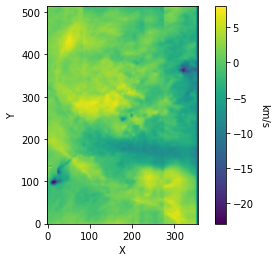

In [9]:
fig, ax = plt.subplots()


dataRV=vha-np.mean(vha[good])
plt.figure(1)
plt.imshow(dataRV, cmap='viridis')
cbar = plt.colorbar()
#plt.clim(225,350)
cbar.set_label('km/s', rotation=270, labelpad=15)  

ax.set_xlabel('X')
ax.set_ylabel('Y')


#ax.text(0.9, 0.1, '10 pc',
#        verticalalignment='bottom', horizontalalignment='right',
#        transform=ax.transAxes,
#        color='black', fontsize=20)
    
#plt.axhline(y=50, xmin=0.59, xmax=0.925, linewidth=2, color = 'k')


plt.gca().invert_yaxis()

In [10]:
RV=pd.DataFrame(vha[good])

In [11]:
RV

,0
0,17.951456
1,17.854443
2,17.757425
3,17.686569
4,17.692696
...,...
180917,15.714201
180918,15.647505
180919,15.575974
180920,15.504443


In [12]:
RV=RV.stack().reset_index()

In [13]:
RV[0]

0         17.951456
1         17.854443
2         17.757425
3         17.686569
4         17.692696
            ...    
180917    15.714201
180918    15.647505
180919    15.575974
180920    15.504443
180921    15.432912
Name: 0, Length: 180922, dtype: float64

Text(0.5, 6.79999999999999, 'Radial velocity [km/s]')

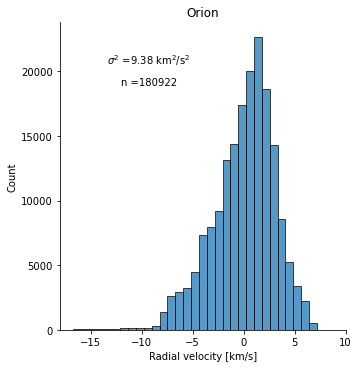

In [14]:
sns.displot(RV[0]-RV[0].mean(),bins=40)
plt.xlim(-18,10)

plt.text(-0.15, 1.15,'n ='+str(RV[0].count()), ha='center', va='center', transform=ax.transAxes, color='k')
#plt.text(0.80, 0.82,'$μ$ ='+str(np.round(RV[0].mean(),2))+' km/s', ha='center', va='center', transform=ax.transAxes, color='k')
plt.text(-0.15, 1.25,'$σ^{2}$ ='+str(np.round(RV[0].var(),2))+' km$^{2}$/s$^{2}$', ha='center', va='center', transform=ax.transAxes, color='k')

plt.title('Orion')

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"
plt.xlabel('Radial velocity [km/s]')


In [15]:
OrionSH = {'iha' : iha[good],
       'vha' : vha[good],
      }
OrionSH

{'iha': array([0.14889697, 0.14900149, 0.14910601, ..., 0.17541054, 0.1726009 ,
        0.16979129]),
 'vha': array([17.95145607, 17.8544426 , 17.75742531, ..., 15.57597446,
        15.50444317, 15.43291187])}

In [16]:
df=pd.DataFrame(vha[good]).stack().reset_index().rename(columns={'level_0':'X', 'level_1':'Y', 0:'RV'})
df.describe()

,X,Y,RV
count,180922.000000,180922.0,180922.000000
mean,90460.500000,0.0,16.776593
std,52227.827039,0.0,3.061953
min,0.000000,0.0,-6.101346
25%,45230.250000,0.0,15.006875
50%,90460.500000,0.0,17.217461
75%,135690.750000,0.0,18.859875
max,180921.000000,0.0,24.722612


In [17]:
import pickle

f = open('VF\\OrionSH.pkl',"wb")
pickle.dump(df,f)
f.close()

In [18]:
f = open('VF2\\OrionSH.pkl',"wb")
pickle.dump(OrionSH,f)
f.close()

In [19]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 4.323915481567383 seconds ---
